# Destek Vektör Makine öğrenmesi ile Meme Kanseri Hücrelerinin Sınıflandırılması ve Veri Görselleştirme

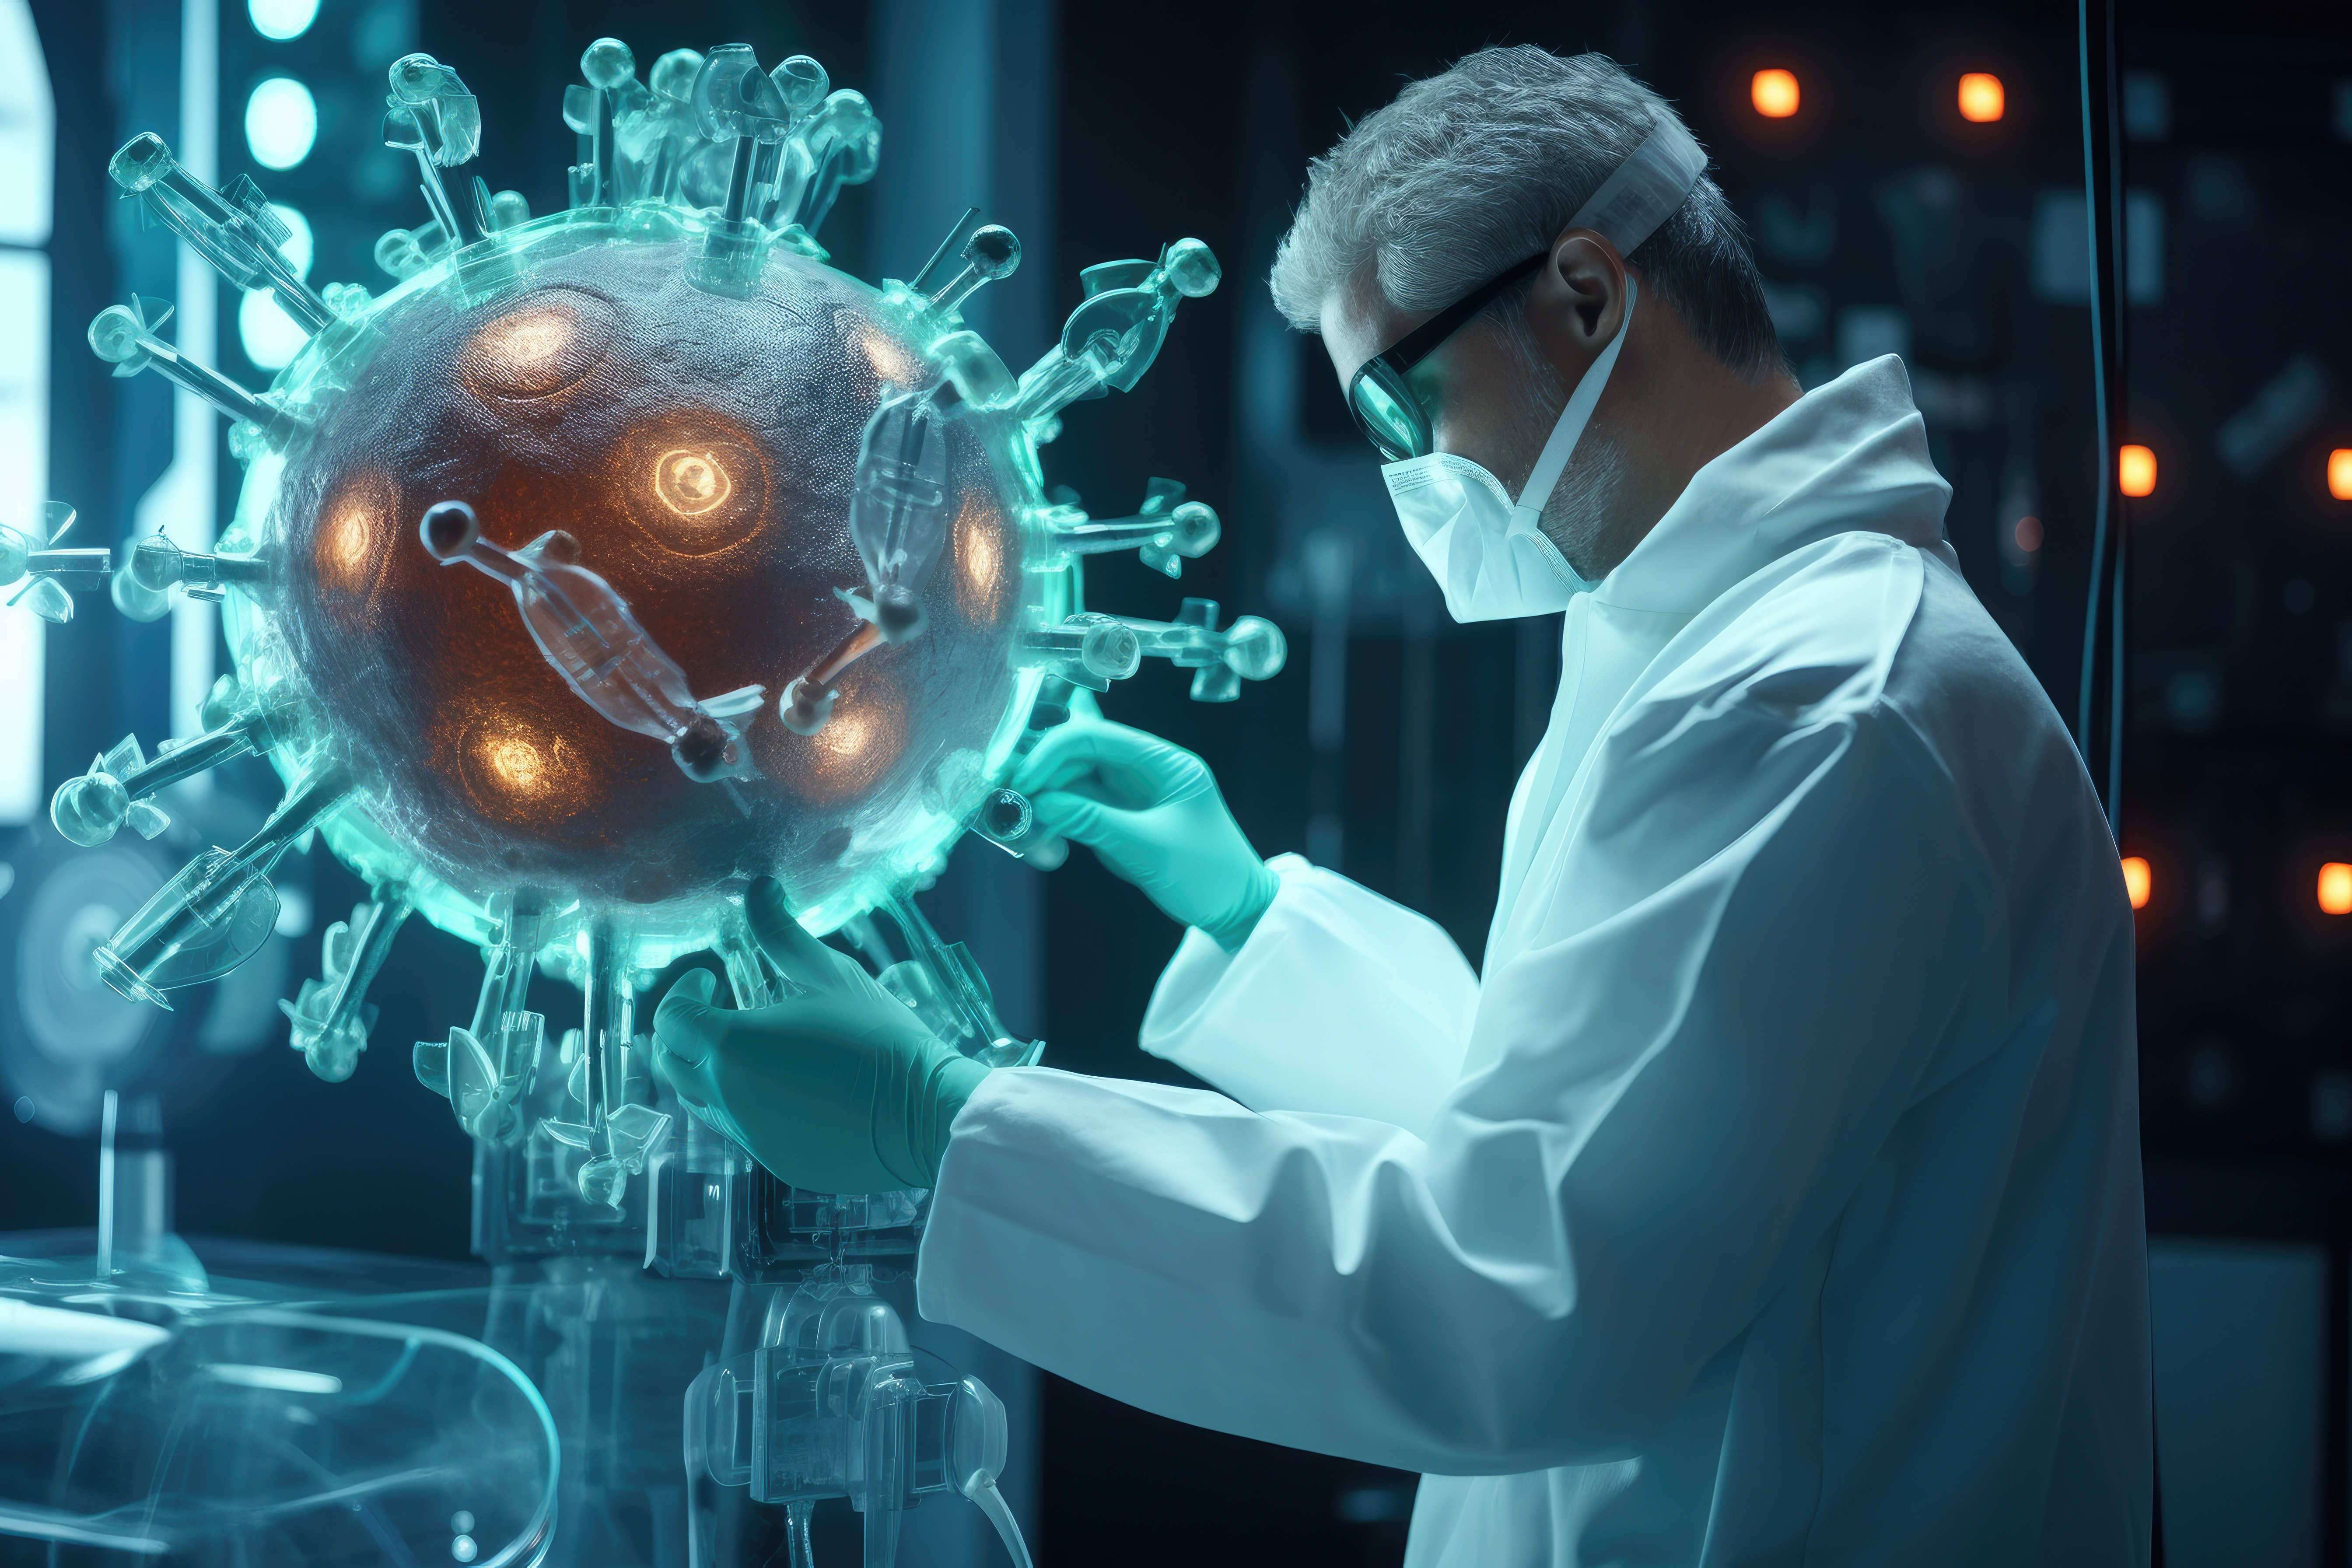

In [12]:
# Gerekli kütüphanelerin import edilmesi
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Meme kanseri veri setinin yüklenmesi
kanser = datasets.load_breast_cancer()

In [5]:
# Daha iyi anlamak için DataFrame'e dönüştürülmesi
veri = pd.DataFrame(kanser.data, columns=kanser.feature_names)
veri['hedef'] = kanser.target

In [6]:
# Verilerin özellikler ve hedef olarak ayrılması
X = veri.iloc[:, :-1].values
y = veri.iloc[:, -1].values

In [ ]:
# Verinin eğitim ve test olarak bölünmesi
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Verinin standartlaştırılması
scaler = StandardScaler()
X_egitim = scaler.fit_transform(X_egitim)
X_test = scaler.transform(X_test)

In [8]:
# SVM sınıflandırıcısının tanımlanması ve eğitilmesi
svm = SVC(kernel='linear')
svm.fit(X_egitim, y_egitim)

SVC(kernel='linear')

In [9]:
# Tahminlerin yapılması
y_tahmin = svm.predict(X_test)

In [10]:
# Modelin değerlendirilmesi
dogruluk = accuracy_score(y_test, y_tahmin)
karma_matrisi = confusion_matrix(y_test, y_tahmin)
sınıflandırma_raporu = classification_report(y_test, y_tahmin)

In [11]:
print(f'Doğruluk: {dogruluk}')
print('Karmaşıklık Matrisi:')
print(karma_matrisi)
print('Sınıflandırma Raporu:')
print(sınıflandırma_raporu)

Doğruluk: 0.956140350877193
Karmaşıklık Matrisi:
[[41  2]
 [ 3 68]]
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [14]:
# Meme kanseri veri setinin yüklenmesi
kanser = datasets.load_breast_cancer()

In [15]:
# DataFrame'e dönüştürülmesi
veri = pd.DataFrame(kanser.data, columns=kanser.feature_names)
veri['hedef'] = kanser.target

In [16]:
# İlk 5 satırın gösterilmesi
print(veri.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

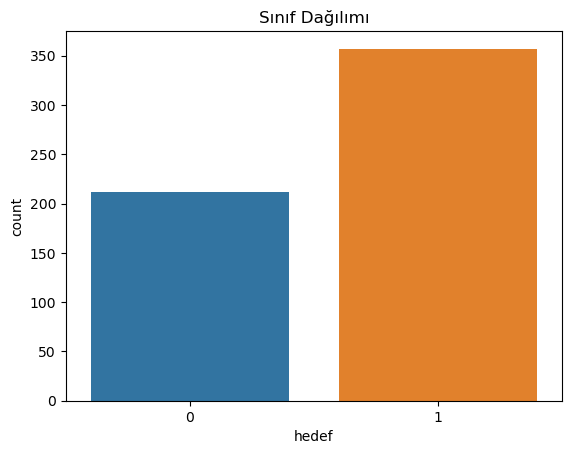

In [17]:
# Sınıf dağılımının görselleştirilmesi
sns.countplot(x='hedef', data=veri)
plt.title('Sınıf Dağılımı')
plt.show()

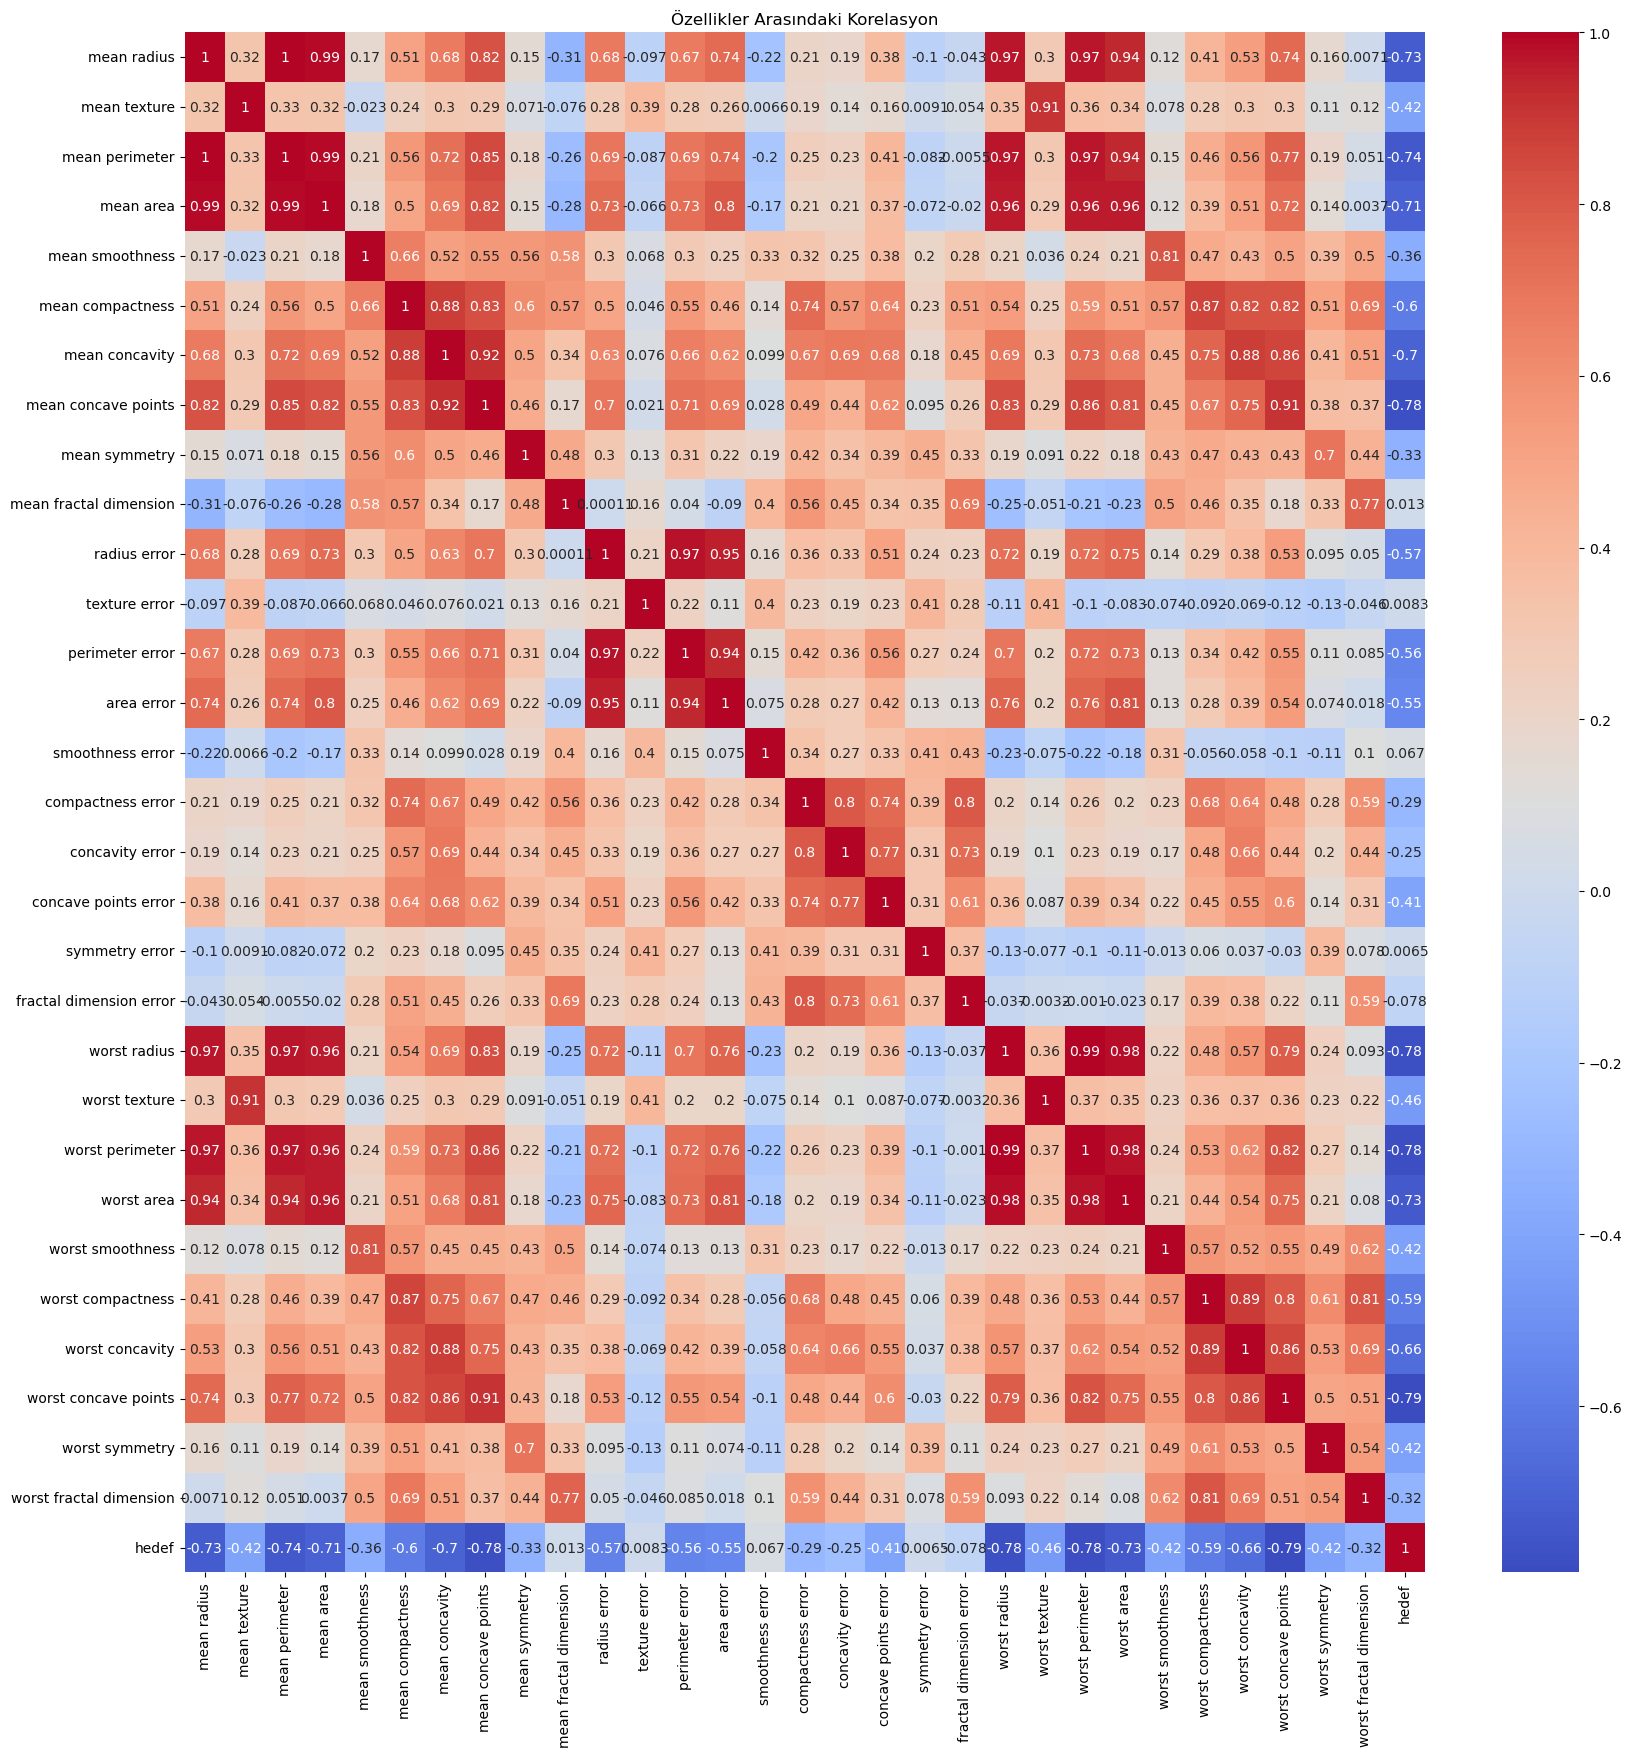

In [18]:
# Özellikler arasındaki korelasyonun ısı haritası ile görselleştirilmesi
plt.figure(figsize=(20, 20))
sns.heatmap(veri.corr(), annot=True, cmap='coolwarm')
plt.title('Özellikler Arasındaki Korelasyon')
plt.show()

C:\Users\realb\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


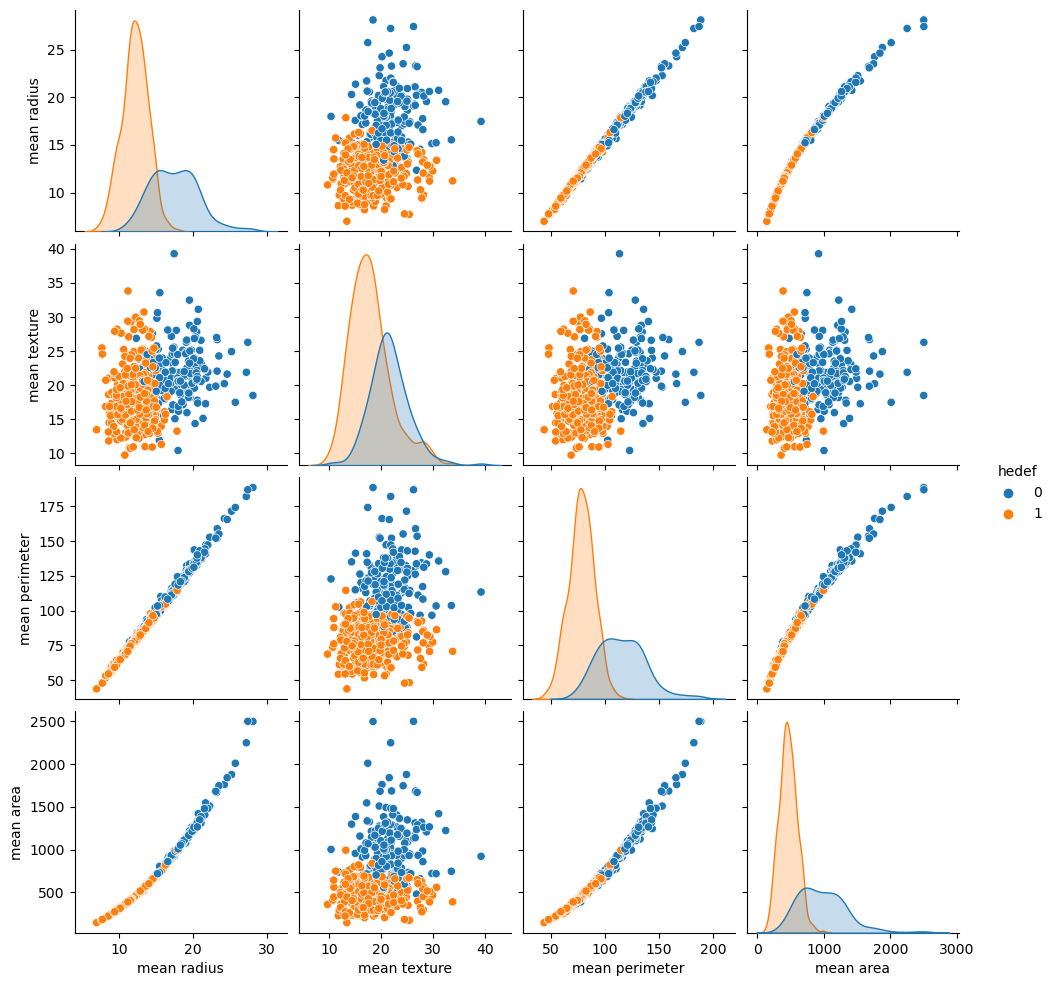

In [19]:
# Birkaç özellik için dağılım grafikleri
sns.pairplot(veri, vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area'], hue='hedef')
plt.show()